# Experimental Data-Analysis 



In [ ]:
!pip install pandas
!pip install matplotlib

In [2]:
import  pandas      as      pd
import  numpy       as      np
from    pathlib     import  Path
from    dataclasses import  dataclass
import  math
import  matplotlib.pyplot as plt    

class   Experimento:
    def __init__(self, volt_iny, volt_elec, corr_elec, resistencia):
        self.volt_iny    =   volt_iny
        self.volt_elec   =   volt_elec
        self.corr_elec   =   corr_elec
        self.resistencia =   resistencia

def _minlen(*list):
    return  min(len(lst) for lst in list)

def _minimum(exp1, exp2):
    if exp1[0] > exp2[0]:
        vl_min  =   exp1[0]
    else:
        vl_min  =   exp2[0]
    return vl_min

In [3]:
path_1  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Data/Experimental-Data/EXP-A_20250917_163949.csv")    # Path for the experiment 20250917
path_2  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Data/Experimental-Data/EXP-A_20250922_100524.csv")     # Path for the experiment 20250922
# Import the experiment "20250917"
df_1    =   pd.read_csv(path_1, encoding="latin-1")
# Import the experiment "20250922"
df_2    =   pd.read_csv(path_2, encoding="latin-1")
#df_1.head() 
#df_1.head()

cols_extract    =   ["Voltaje Inyectado (V)", "Voltaje Electrodos (V)", "Corriente Electrodos (A)", "Resistencia"]
dt_exp1         =   df_1[cols_extract].copy()   #Exp 20250917
dt_exp2         =   df_2[cols_extract].copy()   #Exp 20250922

exp_1   =   Experimento(
    volt_iny    =   dt_exp1["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp1["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp1["Corriente Electrodos (A)"],
    resistencia =   dt_exp1["Resistencia"],
)

exp_2   =   Experimento(
    volt_iny    =   dt_exp2["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp2["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp2["Corriente Electrodos (A)"],
    resistencia =   dt_exp2["Resistencia"],
)

# Voltage from the both experiments 
volt_iny_20250917   =   exp_1.volt_iny.to_list()   #   voltage supply for exp_1
volt_iny_20250922   =   exp_2.volt_iny.to_list()   #   voltage supply for exp_2
volt_elec_20250917  =   exp_1.volt_elec.to_list()  #   from exp_1
volt_elec_20250922  =   exp_2.volt_elec.to_list()  #   from exp_2

#Current from the both experiments 
curr_elec_20250917  =   exp_1.corr_elec.to_list()   # Current electrodes from the exp_1
curr_elec_20250922  =   exp_2.corr_elec.to_list()   # Current electrodes from the exp_2

#Resistance from the both experiments
res_20250917        =   exp_1.resistencia.to_list() #   Resistance from the exp_1
res_20250922        =   exp_2.resistencia.to_list() #   Resistance from the exp_2

In [ ]:
# Now we filter the data for extract only the values that we need to work with
min_value       =   _minimum(volt_iny_20250917, volt_iny_20250922)  # Min value for extract the same number of values
print(min_value)
min_val_curr    =   1.2                                             # Exact value where start the measure of current across the plates
value_res_1     =   1.2                                             # First low limit for extract the value of the resistance
value_res_2     =   2.5                                             # Second low limit for extract the value of the resistace
max_value       =   8.0                                             # Value where the both experiments report the end of the experiment
pos_curr_22     =   0                                               # Value of position where is the value of the current 
pos_curr_17     =   0                                               # Value of position where is the value of the current 
pos_res1_22     =   0                                               # Value of position where is the value of the resistance                                                
pos_res2_22     =   0                                               # Value of position where is the value of the resistance                                            
pos_res1_17     =   0                                               # Value of position where is the value of the resistance 
pos_res2_17     =   0                                               # Value of position where is the value of the resistance 


volt_iny_filt_20250917  =   []      #   Variable for the volt_iny filtered values
volt_elec_filt_20250917 =   []      #   Variable for the volt_elec filtered values from the exp_1
volt_elec_filt_20250922 =   []      #   Variable for the volt_elec filtered values from the exp_2
curr_elec_filt_20250917 =   []      #   Variable for the curr_elec filtered values from the exp_1
curr_elec_filt_20250922 =   []      #   Variable for the curr_elec filtered values from the exp_2
res_filt_20250917       =   []      #   Variable for the resistance filtered values from the exp_1
res_filt_20250922       =   []      #   Variable for the resistance filtered values from the exp_2
res_filt_20250917_1     =   []      #   Second Variable for the second low limit value of resistance of the exp_1
res_filt_20250922_1     =   []      #   Second Variable for the second low limit value of resistance of the exp_2
pwr_consup_20250917     =   []      #   Power Consumption of experiment 20250917 V_elec*I_elec
pwr_consup_20250922     =   []      #   Power Consumption of experiment 20250922 V_elec*I_elec



for x in range(len(volt_iny_20250917)):
    if  min_value       <=  volt_iny_20250917[x]    <=  max_value:
        volt_iny_filt_20250917.append(volt_iny_20250917[x])
        volt_elec_filt_20250917.append(volt_elec_20250917[x])
    
    if  min_val_curr    <=  volt_iny_20250917[x]    <=  max_value:
        if  min_val_curr    ==  volt_iny_20250917[x]:
            pos_curr_17 =   x
        pwr_consup_20250917.append(volt_elec_20250917[x]*curr_elec_20250917[x])
        curr_elec_filt_20250917.append(curr_elec_20250917[x])
    
    if  value_res_1     <=  volt_iny_20250917[x]    <=  max_value:
        if  value_res_1     ==  volt_iny_20250917[x]:
            pos_res1_17 =   x
        res_filt_20250917.append(res_20250917[x])
    
    if  value_res_2     <=  volt_iny_20250917[x]    <=  max_value:
        if  value_res_2     ==  volt_iny_20250917[x]:
            pos_res2_17 =   x  
        res_filt_20250917_1.append(res_20250917[x])

for x in range(len(volt_iny_20250922)):
    if  min_value       <=  volt_iny_20250922[x]    <=  max_value:
        volt_elec_filt_20250922.append(volt_elec_20250922[x])
    
    if  min_val_curr    <=  volt_iny_20250922[x]    <=  max_value:
        if  min_val_curr    ==  volt_iny_20250922[x]:
            pos_curr_22 =   x
        pwr_consup_20250922.append(volt_elec_20250922[x]*curr_elec_20250922[x]) 
        curr_elec_filt_20250922.append(curr_elec_20250922[x])
    
    if  value_res_1     <=  volt_iny_20250922[x]    <=  max_value:
        if  value_res_1     ==  volt_iny_20250922[x]:
            pos_res1_22 =   x
        res_filt_20250922.append(res_20250922[x])
    
    if  value_res_2     <=  volt_iny_20250922[x]    <=  max_value:
        if  value_res_2     ==  volt_iny_20250922[x]:
            pos_res2_22 =   x
        res_filt_20250922_1.append(res_20250922[x])

print(f"The length of 'volt_iny'= {len(volt_iny_filt_20250917)}, 'volt_elec_17'={len(volt_elec_filt_20250917)}, 'volt_elec_22'={len(volt_elec_filt_20250922)}")
print(f"The length of 'curr_elec_17'={len(curr_elec_filt_20250917)}, 'curr_elec_22'={len(curr_elec_filt_20250922)}")
print(f"The length of 'resistance_17_1'={len(res_filt_20250917)}, 'resistance_22_1'={len(res_filt_20250922)} ")
print(f"The length of 'resistance_17_2'={len(res_filt_20250917_1)}, 'resistance_22_2'={len(res_filt_20250922_1)} ")
print(f"The length of 'power_consum_17'={len(pwr_consup_20250917)}, 'power_consum_22'={len(pwr_consup_20250922)}")
print(f"The position of 'curr_17'={pos_curr_17}, 'curr_22'={pos_curr_22}")
print(f"The position of 'res1_17'={pos_res1_17}, 'res1_22'={pos_res1_22}")
print(f"The position of 'res2_17'={pos_res2_17}, 'res2_22'={pos_res2_22}")



0.6
The length of 'volt_iny'= 75, 'volt_elec_17'=75, 'volt_elec_22'=75
The length of 'curr_elec_17'=69, 'curr_elec_22'=69
The length of 'resistance_17_1'=69, 'resistance_22_1'=69 
The length of 'resistance_17_2'=56, 'resistance_22_2'=56 
The length of 'power_consum_17'=69, 'power_consum_22'=69
The position of 'curr_17'=6, 'curr_22'=9
The position of 'res1_17'=6, 'res1_22'=9
The position of 'res2_17'=19, 'res2_22'=22


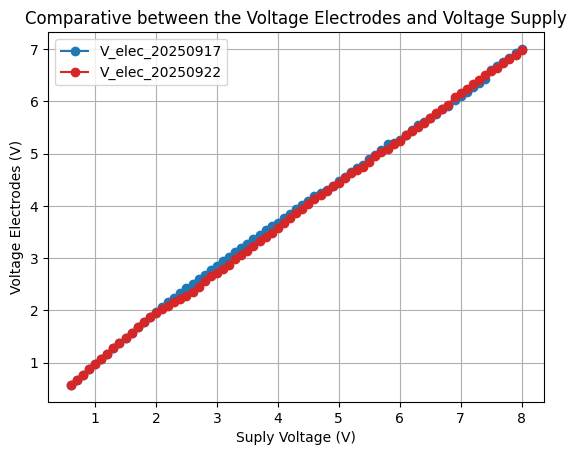

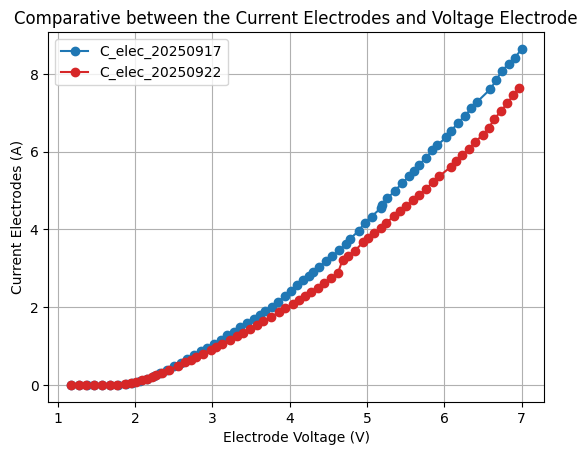

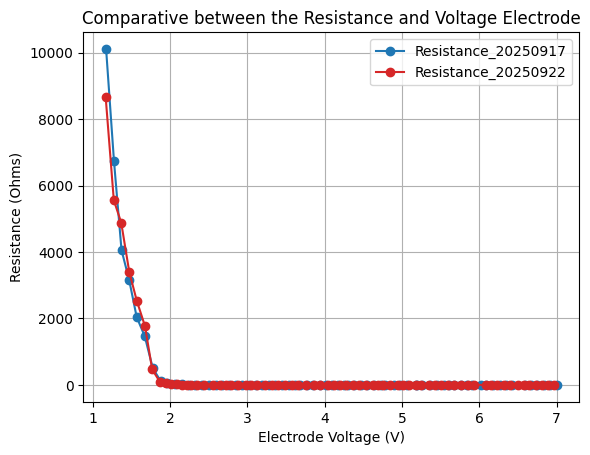

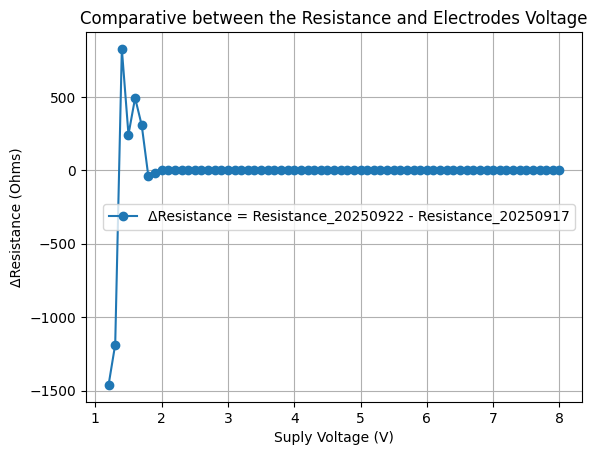

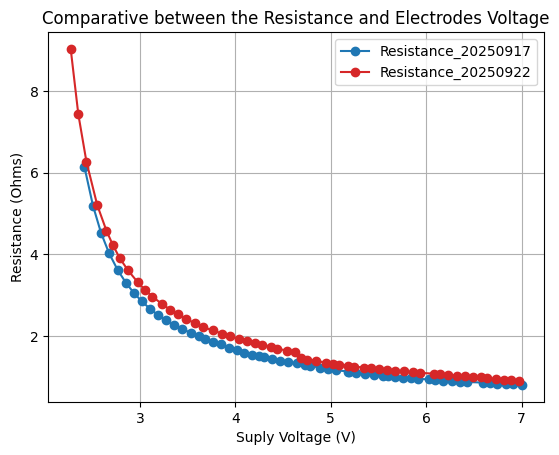

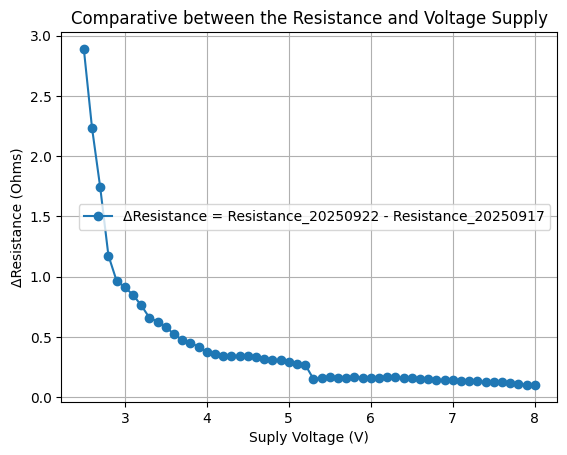

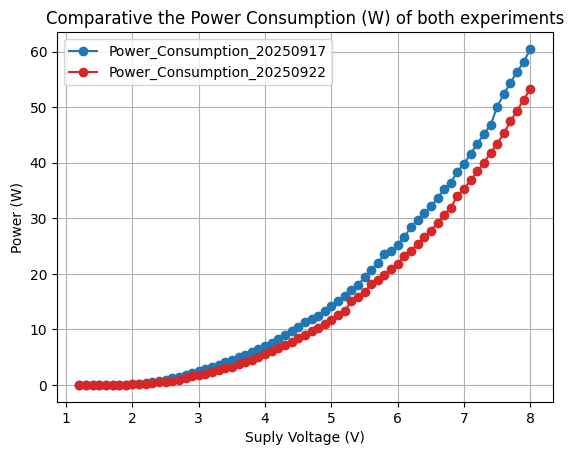

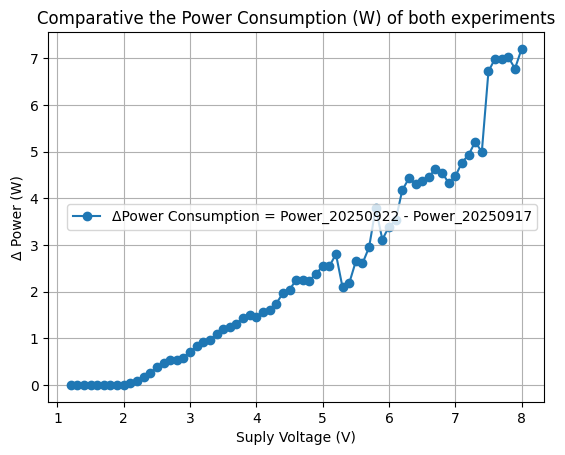

In [16]:


# Ploting "volt_iny_filt_20250917 (x)" vs "volt_elec_20250917" - "volt_elec_20250922" (y)

n1  =   _minlen(volt_iny_filt_20250917, volt_elec_filt_20250917, volt_elec_filt_20250922)
x1  =   volt_iny_filt_20250917[:n1]
y1  =   volt_elec_filt_20250917
y2  =   volt_elec_filt_20250922

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='V_elec_20250917')
plt.plot(x1, y2, marker='o', linestyle='-', color='tab:red', label='V_elec_20250922')
plt.title('Comparative between the Voltage Electrodes and Voltage Supply')
plt.xlabel('Suply Voltage (V)')
plt.ylabel('Voltage Electrodes (V)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_20250917, curr_elec_filt_20250917, curr_elec_filt_20250922)
x1  =   volt_elec_20250917[pos_curr_17:(n1+pos_curr_17)]
x2  =   volt_elec_20250922[pos_curr_22:(n1+pos_curr_22)]
y1  =   curr_elec_filt_20250917
y2  =   curr_elec_filt_20250922

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='C_elec_20250917')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='C_elec_20250922')
plt.title('Comparative between the Current Electrodes and Voltage Electrode')
plt.xlabel('Electrode Voltage (V)')
plt.ylabel('Current Electrodes (A)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_20250917, res_filt_20250917, res_filt_20250922)
x1  =   volt_elec_20250917[pos_res1_17:(n1+pos_res1_17)]
x2  =   volt_elec_20250922[pos_res1_22:(n1+pos_res1_22)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   res_filt_20250917
y2  =   res_filt_20250922

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Resistance_20250917')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Resistance_20250922')
plt.title('Comparative between the Resistance and Voltage Electrode')
plt.xlabel('Electrode Voltage (V)')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_iny_20250917, res_filt_20250917, res_filt_20250922)
x1  =   volt_iny_20250917[pos_res1_17:(n1+pos_res1_17)]
y1  =   [res_filt_20250922[i] - res_filt_20250917[i] for i in range(n1)]

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='ΔResistance = Resistance_20250922 - Resistance_20250917')
plt.title('Comparative between the Resistance and Electrodes Voltage')
plt.xlabel('Suply Voltage (V)')
plt.ylabel('ΔResistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_20250917, res_filt_20250917_1, res_filt_20250922_1)
x1  =   volt_elec_20250917[pos_res2_17:(n1+pos_res2_17)]
x2  =   volt_elec_20250922[pos_res2_22:(n1+pos_res2_22)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   res_filt_20250917_1
y2  =   res_filt_20250922_1        

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Resistance_20250917')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Resistance_20250922')
plt.title('Comparative between the Resistance and Electrodes Voltage')
plt.xlabel('Suply Voltage (V)')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_iny_20250917, res_filt_20250917_1, res_filt_20250922_1)
x1  =   volt_iny_20250917[pos_res2_17:(n1+pos_res2_17)]
y1  =   [res_filt_20250922_1[i] - res_filt_20250917_1[i] for i in range(n1)]

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='ΔResistance = Resistance_20250922 - Resistance_20250917')
plt.title('Comparative between the Resistance and Voltage Supply')
plt.xlabel('Suply Voltage (V)')
plt.ylabel('ΔResistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_iny_20250917, pwr_consup_20250917, pwr_consup_20250922)
x1  =   volt_iny_20250917[pos_curr_17:(n1+pos_curr_17)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   pwr_consup_20250917
y2  =   pwr_consup_20250922      


plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Power_Consumption_20250917')
plt.plot(x1, y2, marker='o', linestyle='-', color='tab:red', label='Power_Consumption_20250922')
plt.title('Comparative the Power Consumption (W) of both experiments')
plt.xlabel('Suply Voltage (V)')
plt.ylabel('Power (W)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_iny_20250917, pwr_consup_20250917, pwr_consup_20250922)
x1  =   volt_iny_20250917[pos_curr_17:(n1+pos_curr_17)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   [abs(pwr_consup_20250922[i] - pwr_consup_20250917[i]) for i in range(n1)]   

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='ΔPower Consumption = Power_20250922 - Power_20250917')
plt.title('Comparative the Power Consumption (W) of both experiments')
plt.xlabel('Suply Voltage (V)')
plt.ylabel('Δ Power (W)')
plt.grid(True)
plt.legend()
plt.show()
